<a href="https://colab.research.google.com/github/chaitanya-kolliboyina/Spam-SMS-Classifier/blob/main/SMS_Spam_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#ML Assignment


#SMS Classifier using Neural Networks(Dense, LSTM,BI- LSTM)

Short message service, popularly known as SMS is a way of communication through text. It is used to  send messages int the form of person-person or an organisation to person. In present scenarios we are knowingly and unknowingly give our mobile number to many organistions. These organisations use our contact information to advertise their product or service even though it is not necessary for us in the form of text message (or) SMS. 

<p>&nbsp;</p>

Such type of SMS are considered as spam. When these spam messages  number is in control, we can delete manually but now-a-days this number is huge and cause disturbance to us. This is where this project comes into picture. The main idea is, if we make a system which classifies the SMS into SPAM and HAM(not spam) by learning from the thousands of examples which are already classified  then this task of classification woukld become easier and helps the user to stay organised . 

<p>&nbsp;</p>

The main aim of this project is to design a classifier with help of various neural network models viz. Dense, LSTM, Bi-LSTM and based on the accuracy the best model will be decided to use as a " SMS spam classifier "



##Domain - Customer Care
<p>&nbsp;</p>

###Choice of technology - Python, Neural Networks

####Importing required libraries 

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional


###Data preperation for model

In [92]:
data = pd.read_csv("SMSSpamCollection",sep ='\t',names=["label", "message"])

In [93]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [94]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [95]:
data.isnull().describe()

,label,message
count,5572,5572
unique,1,1
top,False,False
freq,5572,5572


No row is vacant. Every row contains some text and label


In [96]:
duplicated = data[data.duplicated()]

In [97]:
duplicated

,label,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [98]:
data.shape

(5572, 2)

In [99]:
data.columns

Index(['label', 'message'], dtype='object')

In [100]:
ham_messages = data[data.label=='ham']
spam_messages = data[data.label=='spam']

In [101]:

print(ham_messages)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
6      ham  Even my brother is not like to speak with me. ...
...    ...                                                ...
5565   ham                                       Huh y lei...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[4825 rows x 2 columns]


 Create numpy list to visualize using wordcloud

In [102]:
ham_msg_text = " ".join(ham_messages.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_messages.message.to_numpy().tolist())
print(ham_msg_text)
print(spam_msg_text)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

####Importing Wordcloud for knowing what are the words in those messages and representing them graphically 

In [103]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

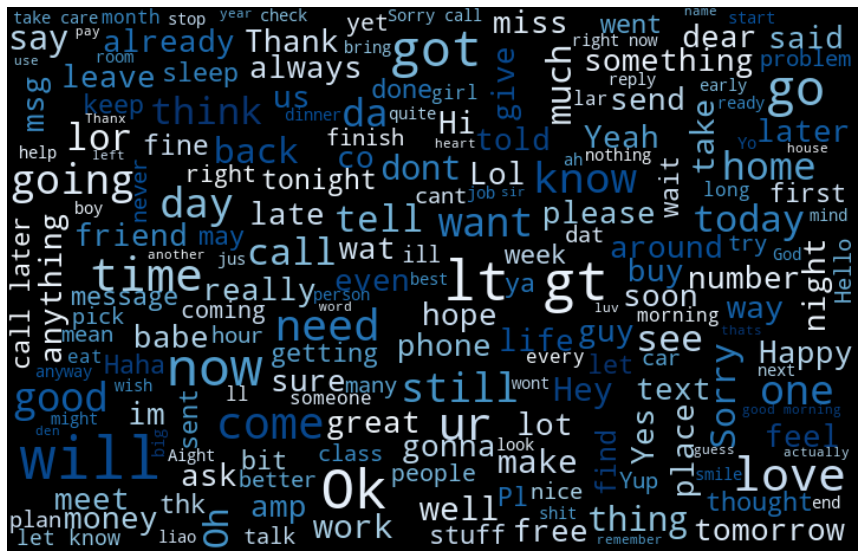

In [104]:

ham_msg_cloud = WordCloud(width =720, height =460, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

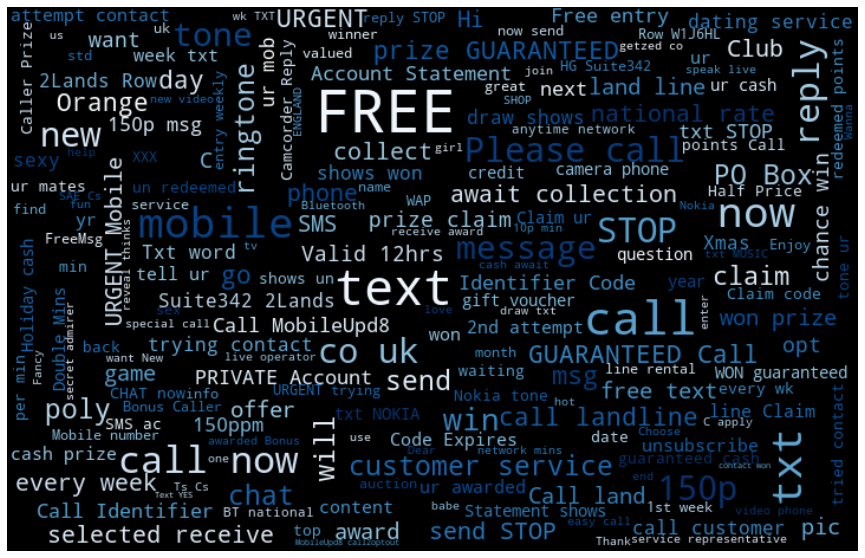

In [105]:
spam_msg_cloud = WordCloud(width =720, height =460, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

####Graphical representation of the number of SPAM and HAM messages

15.481865284974095

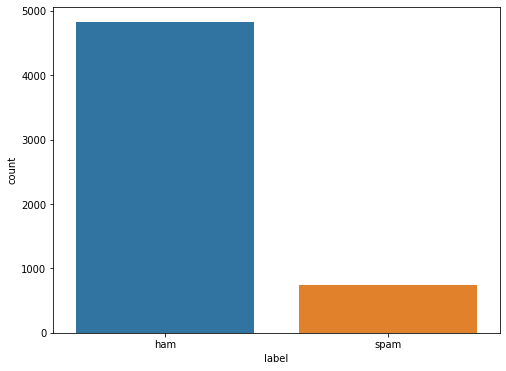

In [106]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(data.label)
# Percentage of spam messages
(len(spam_messages)/len(ham_messages))*100 # 15.48%

####one way to fix it is to downsample the ham msg

In [107]:

ham_msg_df = ham_messages.sample(n = len(spam_messages), random_state = 44)
spam_msg_df = spam_messages
print(ham_msg_df.shape, spam_msg_df.shape)


(747, 2) (747, 2)


####Create a dataframe with these ham and spam msg

Text(0.5, 0, 'Message types')

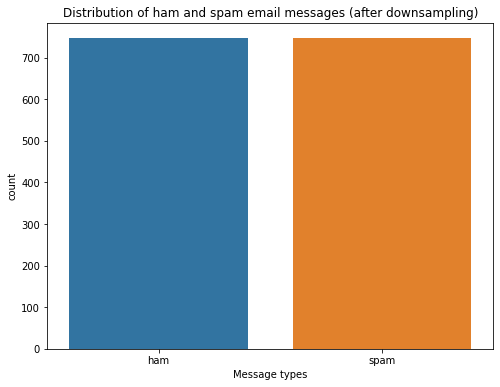

In [108]:

msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [109]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,73.238286
spam,138.670683


In [118]:

# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
# Split data into train and test
train_msg,rem_msg, train_labels, rem_labels = train_test_split(msg_df['message'], msg_label,test_size=0.4,random_state=434)

In [120]:
val_msg,test_msg, val_labels, test_labels = train_test_split(rem_msg, rem_labels,test_size=0.2,random_state=434)

In [121]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

####Importing Tokenizer for assigning the numbers to the words in the text

In [122]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [123]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

####Indexes for all the words in the form of dictionary

In [124]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 '2': 11,
 'now': 12,
 'is': 13,
 'and': 14,
 'on': 15,
 'free': 16,
 'or': 17,
 'in': 18,
 'ur': 19,
 '4': 20,
 'have': 21,
 'txt': 22,
 'with': 23,
 'me': 24,
 'are': 25,
 'from': 26,
 'of': 27,
 'get': 28,
 'just': 29,
 'text': 30,
 'my': 31,
 'mobile': 32,
 'stop': 33,
 'this': 34,
 'will': 35,
 'it': 36,
 'be': 37,
 'no': 38,
 'not': 39,
 'claim': 40,
 'we': 41,
 'can': 42,
 'that': 43,
 'send': 44,
 'only': 45,
 'so': 46,
 'reply': 47,
 'www': 48,
 'if': 49,
 'our': 50,
 'prize': 51,
 'at': 52,
 'but': 53,
 'go': 54,
 'out': 55,
 '150p': 56,
 'do': 57,
 'uk': 58,
 'new': 59,
 'please': 60,
 'cash': 61,
 '1': 62,
 'won': 63,
 't': 64,
 '50': 65,
 'tone': 66,
 "i'm": 67,
 'who': 68,
 'urgent': 69,
 'service': 70,
 'been': 71,
 'up': 72,
 'all': 73,
 'win': 74,
 'nokia': 75,
 'when': 76,
 'week': 77,
 'contact': 78,
 'com': 79,
 'min': 80,
 'by': 81,
 'love': 82,
 'co': 83,
 '

In [139]:

# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
val_sequences = tokenizer.texts_to_sequences(val_msg)
val_padded = pad_sequences (val_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [141]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of val tensor     : ', val_padded.shape)
print('Shape of testing tensor : ', testing_padded.shape)


Shape of training tensor:  (896, 50)
Shape of val tensor     :  (478, 50)
Shape of testing tensor :  (120, 50)


In [142]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(5, 10)

In [143]:

# After padding
len(training_padded[0]), len(training_padded[1])


(50, 50)

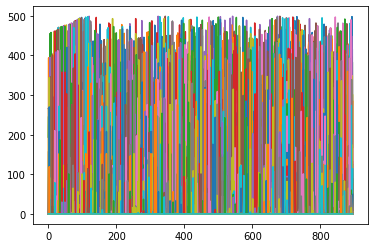

In [144]:
plt.plot(training_padded)
plt.show()

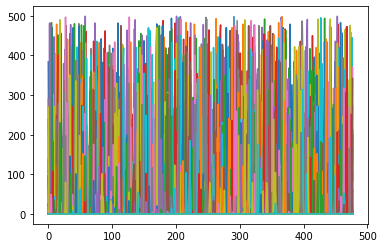

In [145]:
plt.plot(val_padded)
plt.show()

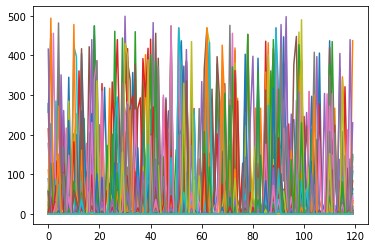

In [130]:
plt.plot(testing_padded)
plt.show()

In [131]:
print(training_padded[0])

[  1   1 194   1 266   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [146]:
len(training_padded)

896

In [147]:
len(val_padded)

478

In [148]:
len(testing_padded)

120

In [149]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [150]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [151]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [153]:
# fitting a dense spam detector model
num_epochs = 25
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(val_padded, val_labels),verbose = 2 )

Epoch 1/25
28/28 - 1s - loss: 0.6887 - accuracy: 0.6518 - val_loss: 0.6834 - val_accuracy: 0.7573
Epoch 2/25
28/28 - 0s - loss: 0.6766 - accuracy: 0.7891 - val_loss: 0.6664 - val_accuracy: 0.8410
Epoch 3/25
28/28 - 0s - loss: 0.6509 - accuracy: 0.8326 - val_loss: 0.6311 - val_accuracy: 0.8117
Epoch 4/25
28/28 - 0s - loss: 0.6073 - accuracy: 0.8404 - val_loss: 0.5792 - val_accuracy: 0.8598
Epoch 5/25
28/28 - 0s - loss: 0.5498 - accuracy: 0.8605 - val_loss: 0.5156 - val_accuracy: 0.8661
Epoch 6/25
28/28 - 0s - loss: 0.4823 - accuracy: 0.8828 - val_loss: 0.4513 - val_accuracy: 0.8828
Epoch 7/25
28/28 - 0s - loss: 0.4231 - accuracy: 0.8873 - val_loss: 0.3911 - val_accuracy: 0.8870
Epoch 8/25
28/28 - 0s - loss: 0.3659 - accuracy: 0.9074 - val_loss: 0.3416 - val_accuracy: 0.8933
Epoch 9/25
28/28 - 0s - loss: 0.3138 - accuracy: 0.9096 - val_loss: 0.2999 - val_accuracy: 0.8996
Epoch 10/25
28/28 - 0s - loss: 0.2790 - accuracy: 0.9107 - val_loss: 0.2658 - val_accuracy: 0.9079
Epoch 11/25
28/28 -

In [154]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9000


[0.19671519100666046, 0.8999999761581421]

In [156]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

In [157]:
metrics

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.688668,0.651786,0.683442,0.757322
1,0.676567,0.789062,0.666352,0.841004
2,0.650893,0.832589,0.631095,0.811715
3,0.607275,0.840402,0.579242,0.859833
4,0.549753,0.860491,0.515559,0.866109
5,0.482303,0.882812,0.451269,0.882845
6,0.423123,0.887277,0.391130,0.887029
7,0.365925,0.907366,0.341610,0.893305
8,0.313839,0.909598,0.299896,0.899582
9,0.278998,0.910714,0.265846,0.907950


In [158]:

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

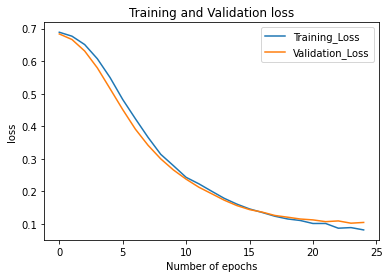

In [159]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

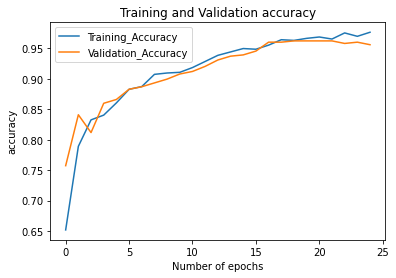

In [160]:

plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [161]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

In [164]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [165]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [166]:
num_epochs = 25
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history1 = model1.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/25
28/28 - 5s - loss: 0.6792 - accuracy: 0.5796 - val_loss: 0.6311 - val_accuracy: 0.6685
Epoch 2/25
28/28 - 1s - loss: 0.4811 - accuracy: 0.7990 - val_loss: 0.3348 - val_accuracy: 0.9044
Epoch 3/25
28/28 - 1s - loss: 0.2884 - accuracy: 0.9120 - val_loss: 0.2463 - val_accuracy: 0.9201
Epoch 4/25
28/28 - 1s - loss: 0.2369 - accuracy: 0.9281 - val_loss: 0.2462 - val_accuracy: 0.9224
Epoch 5/25
28/28 - 1s - loss: 0.2129 - accuracy: 0.9331 - val_loss: 0.2370 - val_accuracy: 0.9277
Epoch 6/25
28/28 - 1s - loss: 0.1938 - accuracy: 0.9377 - val_loss: 0.2265 - val_accuracy: 0.9287
Epoch 7/25
28/28 - 1s - loss: 0.1851 - accuracy: 0.9430 - val_loss: 0.2095 - val_accuracy: 0.9290
Epoch 8/25
28/28 - 1s - loss: 0.1715 - accuracy: 0.9429 - val_loss: 0.2147 - val_accuracy: 0.9267
Epoch 9/25
28/28 - 1s - loss: 0.1487 - accuracy: 0.9547 - val_loss: 0.2470 - val_accuracy: 0.9273
Epoch 10/25
28/28 - 1s - loss: 0.1341 - accuracy: 0.9573 - val_loss: 0.2210 - val_accuracy: 0.9293
Epoch 11/25
28/28 -

In [167]:
# Model performance on test data 
model1.evaluate(testing_padded, test_labels)

4/4 [==============================] - 0s 10ms/step - loss: 0.3898 - accuracy: 0.9103


[0.38975366950035095, 0.9103333353996277]

In [168]:
# Read as a dataframe 
metrics1 = pd.DataFrame(history1.history)
# Rename column
metrics1.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

In [169]:
metrics1

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.679178,0.579554,0.631129,0.668536
1,0.481124,0.799018,0.334832,0.904435
2,0.288425,0.911987,0.246328,0.920084
3,0.236897,0.928058,0.246184,0.922385
4,0.212867,0.933125,0.236953,0.927657
5,0.193774,0.937723,0.226466,0.928703
6,0.185094,0.943036,0.209486,0.928954
7,0.171517,0.942857,0.214671,0.926736
8,0.148667,0.954688,0.246997,0.927322
9,0.134125,0.957255,0.221017,0.929331


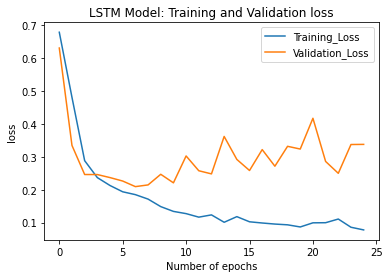

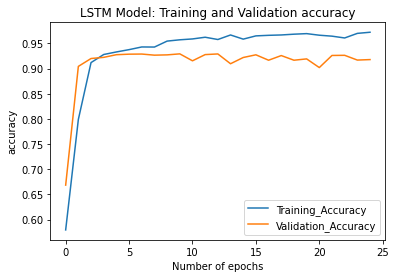

In [171]:
# Create a dataframe
metrics1 = pd.DataFrame(history1.history)
# Rename column
metrics1.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics1[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [172]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [173]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [174]:
# Training
num_epochs = 25
#early_stop = EarlyStopping(monitor='val_loss', patience=2)
history2 = model2.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(val_padded, val_labels),verbose=2)

Epoch 1/25
28/28 - 4s - loss: 0.6847 - accuracy: 0.6187 - val_loss: 0.6679 - val_accuracy: 0.6465
Epoch 2/25
28/28 - 1s - loss: 0.5811 - accuracy: 0.7576 - val_loss: 0.4326 - val_accuracy: 0.8582
Epoch 3/25
28/28 - 1s - loss: 0.3162 - accuracy: 0.9134 - val_loss: 0.2979 - val_accuracy: 0.9069
Epoch 4/25
28/28 - 1s - loss: 0.2370 - accuracy: 0.9319 - val_loss: 0.2154 - val_accuracy: 0.9351
Epoch 5/25
28/28 - 1s - loss: 0.1902 - accuracy: 0.9414 - val_loss: 0.1622 - val_accuracy: 0.9506
Epoch 6/25
28/28 - 1s - loss: 0.1616 - accuracy: 0.9512 - val_loss: 0.1867 - val_accuracy: 0.9388
Epoch 7/25
28/28 - 1s - loss: 0.1423 - accuracy: 0.9610 - val_loss: 0.1510 - val_accuracy: 0.9567
Epoch 8/25
28/28 - 1s - loss: 0.1168 - accuracy: 0.9690 - val_loss: 0.1340 - val_accuracy: 0.9596
Epoch 9/25
28/28 - 1s - loss: 0.0987 - accuracy: 0.9747 - val_loss: 0.1415 - val_accuracy: 0.9587
Epoch 10/25
28/28 - 1s - loss: 0.0854 - accuracy: 0.9788 - val_loss: 0.1332 - val_accuracy: 0.9606
Epoch 11/25
28/28 -

In [175]:
# Model performance on test data 
model2.evaluate(testing_padded, test_labels)

4/4 [==============================] - 0s 8ms/step - loss: 0.2603 - accuracy: 0.9400


[0.26034513115882874, 0.9399999380111694]

In [176]:
metrics2

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.026153,0.993992,0.194757,0.952910
1,0.021395,0.994694,0.191071,0.952107
2,0.019487,0.995900,0.266370,0.943880
3,0.020277,0.994962,0.272910,0.944147
4,0.020950,0.995866,0.224699,0.949967
5,0.018905,0.995899,0.288112,0.942609
6,0.034349,0.991364,0.239376,0.949498
7,0.019896,0.995766,0.242961,0.951371
8,0.017478,0.996502,0.264057,0.950502
9,0.015619,0.997121,0.225673,0.954381


In [177]:
# Read as a dataframe 
metrics2 = pd.DataFrame(history2.history)
# Rename column
metrics2.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

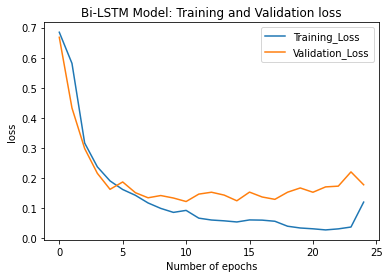

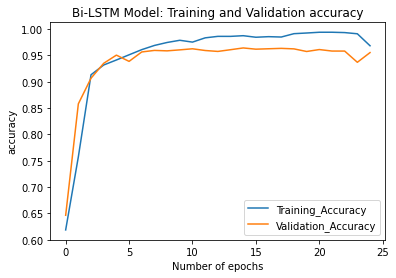

In [178]:
# Create a dataframe
metrics2 = pd.DataFrame(history2.history)
# Rename column
metrics2.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics2[[var1, var2]].plot()
    plt.title('Bi-LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

Total data set size  = 5572
<p>&nbsp;</p>
spam messages =  747
<p>&nbsp;</p>
Ham messages  =  4825
<p>&nbsp;</p>

* Data Samples used  = 1494
     * Ham messages   =  747
     * Spam messages  =  747

     
* Training data   =  896
* validation data = 478
* Testing data    =  120


####Different models accuracy on test data :
<p>&nbsp;</p>

* Dense model = 89.99%
* LSTM model  = 91.03%
* Bi-LSTM model = 93.99%

<p>&nbsp;</p>

####From these accuracies, BI-LSTM model works more accurate than Dense, LSTM

In [180]:
pip --requirements.txt


Usage:   
  pip3 <command> [options]

no such option: --requirements.txt
